In [1]:
from keras.datasets import imdb
import tensorflow as tf
pad_sequences=tf.keras.preprocessing.sequence.pad_sequences

In [2]:
max_features = 10000 #max number of words in vocab
maxlen = 500         #cut off text after this many words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [4]:
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 111s 655ms/step - loss: 0.6827 - acc: 0.5560 - val_loss: 0.6657 - val_acc: 0.5774
Epoch 2/10
157/157 [==============================] - 93s 593ms/step - loss: 0.5304 - acc: 0.7420 - val_loss: 0.5544 - val_acc: 0.7398
Epoch 3/10
157/157 [==============================] - 86s 546ms/step - loss: 0.3527 - acc: 0.8506 - val_loss: 0.3696 - val_acc: 0.8466
Epoch 4/10
157/157 [==============================] - 83s 527ms/step - loss: 0.2665 - acc: 0.8919 - val_loss: 0.4335 - val_acc: 0.8120
Epoch 5/10
157/157 [==============================] - 84s 534ms/step - loss: 0.1834 - acc: 0.9334 - val_loss: 0.4567 - val_acc: 0.8018
Epoch 6/10
157/157 [==============================] - 88s 559ms/step - loss: 0.1211 - acc: 0.9597 - val_loss: 0.6451 - val_acc: 0.7462
Epoch 7/10
157/157 [==============================] - 80s 509ms/step - loss: 0.0780 - acc: 0.9753 - val_loss: 0.5303 - val_acc: 0.8172
Epoch 8/10
157/157 [==============================] - 

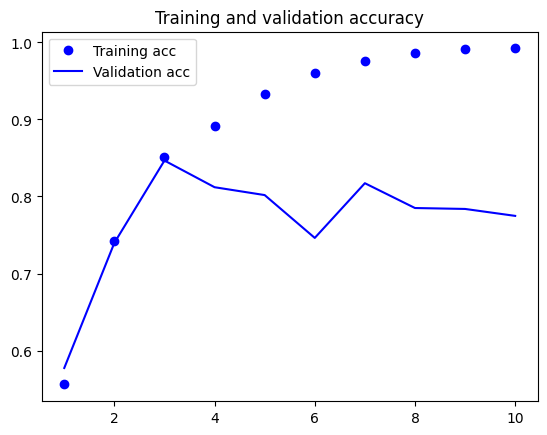

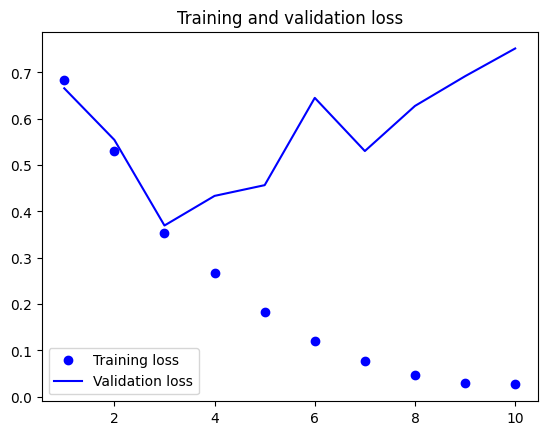

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
!jupyter nbconvert --to html keras_RNN_IMDB_Sentiment_analysis.ipynb